In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [2]:
import os
os.getcwd()


'C:\\Users\\fd299212'

In [3]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_nt.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [4]:
df['Diag'].value_counts()

Neg                  30
Pos - Early Conv     12
Pos - Early Acute    12
Pos - Late           10
Name: Diag, dtype: int64

In [6]:
#df.hist(column='Hum IgG', bins=10)

In [7]:
df.columns

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag'],
      dtype='object')

In [8]:
#dummy_variable_1 = pd.get_dummies(df["Diag"])
#dummy_variable_1.head()

In [9]:
#df = pd.concat([df,dummy_variable_1], axis=1)
#df.drop("Diag",axis = 1,inplace=True)

In [10]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['Diag'])
 
# printing label
#label
df["state"]=label

In [11]:
df.columns
y = df['state'].values
y[0:5]

array([3, 3, 3, 2, 2])

In [22]:
#X = df[['Hum IgG', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45',
#       'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values
#X = df[['P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58', 'P66', 'VlsE', 'ErpL', 'OspD']].values
X = df[['OspC', 'DbpA', 'DbpB', 'P58', 'VlsE', 'ErpL']].values

X[0:5]

array([[ 5.88212057,  1.73861454,  3.95060049,  1.93890358, 12.45584216,
         1.07788947],
       [ 0.82431779,  8.27945815,  3.92530155,  9.25600905,  9.86827322,
         1.63255897],
       [ 1.48438828, 11.07250259,  9.74972207,  3.66964123, 11.61519582,
         2.02558011],
       [ 1.39403148,  1.19700767,  2.35924062,  1.32133611,  4.37009458,
         0.99934068],
       [ 2.28407202,  1.39707483,  1.93265429,  1.51796498, 10.35798884,
         1.23086668]])

In [23]:
#Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 1.91807338, -0.26375664,  0.56816223, -0.23105999,  2.61592421,
        -0.5546976 ],
       [-0.32774603,  2.35800234,  0.55610723,  4.35997861,  1.90290827,
         1.11784959],
       [-0.0346545 ,  3.4775352 ,  3.3314574 ,  0.85487261,  2.38428043,
         2.30296328],
       [-0.07477569, -0.48084831, -0.19012452, -0.61854601,  0.38786108,
        -0.79155315],
       [ 0.32042958, -0.40065562, -0.39339391, -0.49517335,  2.03785155,
        -0.09341099]])

In [31]:
from sklearn.model_selection import train_test_split
#to provide rnd seed, use "random_state="
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, stratify=y, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (42, 6) (42,)
Test set: (22, 6) (22,)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [34]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[0 3 2 2 3]
[0 2 2 1 3]


In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7380952380952381
Test set Accuracy:  0.6818181818181818


In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63636364, 0.72727273, 0.72727273, 0.68181818, 0.72727273,
       0.72727273, 0.72727273, 0.72727273, 0.72727273])

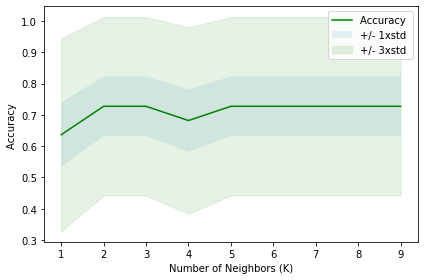

The best accuracy was with 0.7272727272727273 with k= 2


In [37]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)